

{% include toc title="In This Lesson" icon="file-text" %}



In this tutorial, we will explore more advanced plotting techniques using `ggplot2`.



<div class='notice--success' markdown="1">



## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

At the end of this activity, you will be able to:



* Use the `ggplot()` plot function to create custom plots.

* Add labels to x and y axes and a title to your ggplot plot.

* Customize the colors and look of a ggplot plot.



## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What you need



You need `R` and `RStudio` to complete this tutorial. Also you should have

an `earth-analytics` directory setup on your computer with a `/data`

directory with it.



* [How to Setup R / RStudio](/course-materials/earth-analytics/week-1/setup-r-rstudio/)

* [Setup your working directory](/course-materials/earth-analytics/week-1/setup-working-directory/)

* [Intro to the R & RStudio Interface](/course-materials/earth-analytics/week-1/intro-to-r-and-rstudio)



</div>





In our week 1 homework, we used the quick plot function of ggplot2 to plot our data.

In this tutorial, we'll explore ggplot - which offers many more advanced plotting

features.



Let's explore the code below to create a quick plot.




In [1]:
import earthlab as et
import numpy as np
import pandas as pd
%matplotlib inline

In [78]:
paths = et.data.get_data('week_02')
boulder_precip = pd.read_csv(paths[0], index_col=0, parse_dates=['DATE'])

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.
Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


In [79]:
boulder_precip.head()

,DATE,PRECIP
756,2013-08-21,0.1
757,2013-08-26,0.1
758,2013-08-27,0.1
759,2013-09-01,0.0
760,2013-09-09,0.1


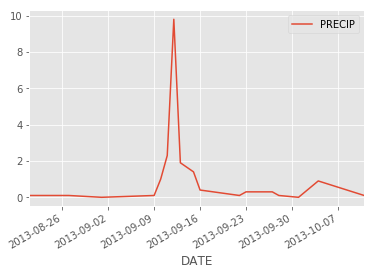

In [80]:
boulder_precip.plot('DATE', 'PRECIP')

In [5]:
# ```{r plot-data, fig.cap="quick plot of precip data"}



# # load the ggplot2 library for plotting

# library(ggplot2)



# # download data from figshare

# # note that we already downloaded the data to our laptops previously

# # but in case you don't have it - re-download it by uncommenting the code below.

# # download.file(url = "https://ndownloader.figshare.com/files/7010681",

# #              destfile = "data/boulder-precip.csv")



# # import data

# boulder_precip <- read.csv(file="data/boulder-precip.csv")



# # view first few rows of the data

# head(boulder_precip)



# # when we download the data we create a dataframe

# # view each column of the data frame using its name (or header)

# boulder_precip$DATE



# # view the precip column

# boulder_precip$PRECIP



# # q plot stands for quick plot. Let's use it to plot our data

# qplot(x=boulder_precip$DATE,

#       y=boulder_precip$PRECIP)



# ```




## Plot with ggplot2



`ggplot2` is a plotting package that makes it simple to create complex plots

from data in a data.frame. It uses default settings, which help to create

publication quality plots with a minimal amount of settings and tweaking.



ggplot graphics are built step by step by adding new elements.



To build a ggplot() we need to:



- bind the plot to a specific data frame using the `data` argument




In [53]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

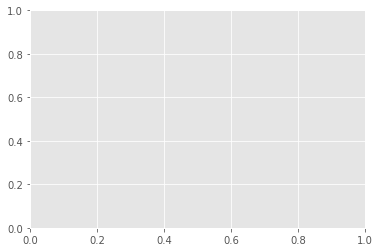

In [54]:
fig, ax = plt.subplots()

In [9]:
# ```{r, eval=FALSE, purl=FALSE, fig.cap="ggplot binding"}

# ggplot(data = boulder_precip)



# ```






- define aesthetics (`aes`), by selecting the variables to be plotted and the variables to define the presentation

     such as plotting size, shape color, etc.,




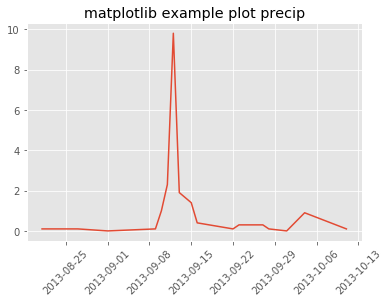

In [55]:
fig, ax = plt.subplots()
ax.plot('DATE', 'PRECIP', data=boulder_precip)
ax.set(title="matplotlib example plot precip")
plt.setp(ax.get_xticklabels(), rotation=45);

In [56]:
# ```{r, eval=FALSE, purl=FALSE, fig.cap="ggplot example plot precip"}

# ggplot(data = boulder_precip, aes(x = DATE, y = PRECIP))

# ```




- add `geoms` -- graphical representation of the data in the plot (points,

     lines, bars). To add a geom to the plot use `+` operator:




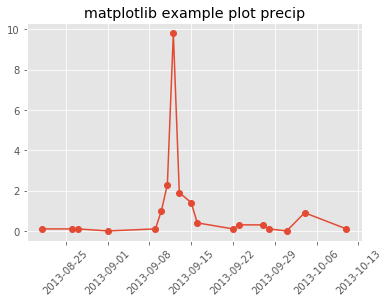

In [57]:
fig, ax = plt.subplots()
ax.plot('DATE', 'PRECIP', '-o', data=boulder_precip)
ax.set(title="matplotlib example plot precip")
plt.setp(ax.get_xticklabels(), rotation=45);

In [58]:
# ```{r first-ggplot, purl=FALSE, fig.cap="ggplot boulder precip"}

# ggplot(data = boulder_precip,  aes(x = DATE, y = PRECIP)) +

#   geom_point()



# ```




The `+` in the `ggplot2` package is particularly useful because it allows you

to modify existing `ggplot` objects. This means you can easily set up plot

"templates" and conveniently explore different types of plots, so the above

plot can also be generated with code like this:




In [59]:
# This would just be a combination of calls to `ax.scatter` `ax.plot` etc
# Could show here that you can also give the values directly to the plotting functions, e.g.:

In [60]:
dates = pd.date_range(pd.datetime(2016, 1, 1), pd.datetime(2016, 1, 2), freq='H')
dates = pd.DataFrame(dates, columns=['date'])

In [61]:
boulder_precip['DATE'].index

Int64Index([756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768,
            769, 770, 771, 772, 773],
           dtype='int64')

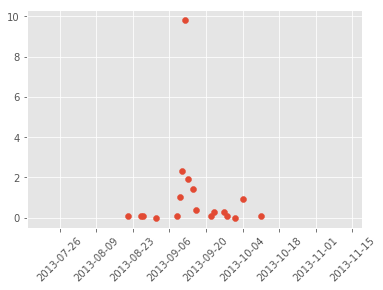

In [62]:
fig, ax = plt.subplots()
ax.scatter(boulder_precip['DATE'].values, boulder_precip['PRECIP'].values)
plt.setp(ax.get_xticklabels(), rotation=45);

In [63]:
# ```{r, first-ggplot-with-plus, eval=FALSE, purl=FALSE, fig.cap="first ggplot"}

# # Create the plot object (nothing will render on your screen)

# precip_plot <-  ggplot(data = boulder_precip,  aes(x = DATE, y = PRECIP))



# # Draw the plot

# precip_plot + geom_point()



# ```


In [64]:
# ```{r, eval=FALSE, purl=TRUE, echo=FALSE, purl=FALSE, fig.cap="2nd ggplot"}

# # Create

# precip_plot <-  ggplot(data = boulder_precip,  aes(x = DATE, y = PRECIP))



# # Draw the plot

# precip_plot + geom_point()

# ```






We can also apply a color to our points




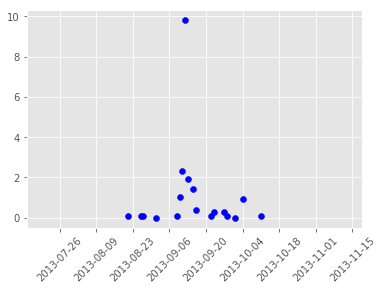

In [66]:
fig, ax = plt.subplots()
ax.scatter(boulder_precip['DATE'].values, boulder_precip['PRECIP'].values,
           c='blue')
plt.setp(ax.get_xticklabels(), rotation=45);

In [67]:
# ```{r adding-colors, purl=FALSE, fig.cap="ggplot with blue points"}

# ggplot(data = boulder_precip,  aes(x = DATE, y = PRECIP)) +

#     geom_point(color = "blue")



# ```




And adjust the transparency.




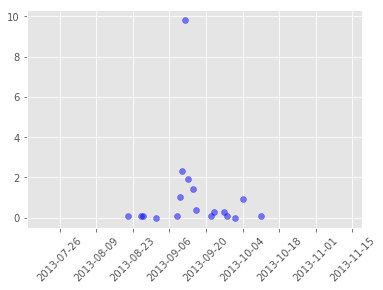

In [69]:
fig, ax = plt.subplots()
ax.scatter(boulder_precip['DATE'].values, boulder_precip['PRECIP'].values,
           c='blue', alpha=.5)
plt.setp(ax.get_xticklabels(), rotation=45);

In [70]:
# ```{r add-alpha, fig.cap="ggplot with blue points and alpha"}

# ggplot(data = boulder_precip,  aes(x = DATE, y = PRECIP)) +

#     geom_point(alpha=.5, color = "blue")



# ```






Or to color each value in the plot differently:




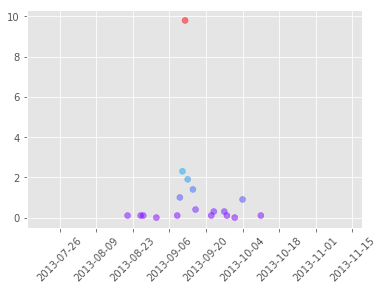

In [72]:
fig, ax = plt.subplots()
ax.scatter(boulder_precip['DATE'].values, boulder_precip['PRECIP'].values,
           c=boulder_precip['PRECIP'].values, alpha=.5, cmap='rainbow')
plt.setp(ax.get_xticklabels(), rotation=45);

In [1]:
# ```{r color-by-species, purl=FALSE, fig.cap="ggplot with colored points"}

# ggplot(data = boulder_precip,  aes(x = DATE, y = PRECIP)) +

#     geom_point(alpha = 0.9, aes(color=PRECIP))



# ```






We can turn our plot into a bar plot.




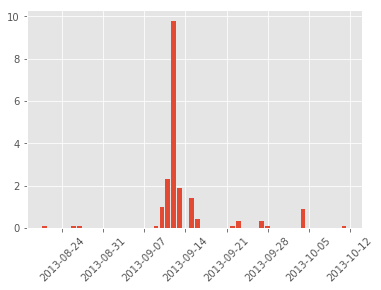

In [73]:
fig, ax = plt.subplots()
ax.bar(boulder_precip['DATE'].values, boulder_precip['PRECIP'].values)
plt.setp(ax.get_xticklabels(), rotation=45);

In [1]:
# ```{r barplot, purl=FALSE, fig.cap="ggplot with bars"}

# ggplot(data = boulder_precip,  aes(x = DATE, y = PRECIP)) +

#     geom_bar(stat="identity")



# ```




Turn the bar outlines blue




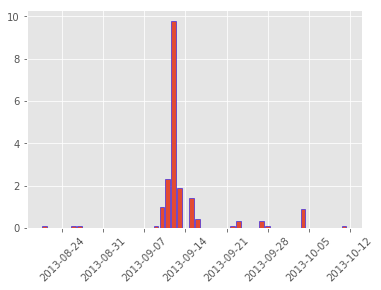

In [75]:
fig, ax = plt.subplots()
ax.bar(boulder_precip['DATE'].values, boulder_precip['PRECIP'].values,
       edgecolor='blue')
plt.setp(ax.get_xticklabels(), rotation=45);

In [1]:
# ```{r bar-color, purl=FALSE, fig.cap="ggplot with blue bars"}

# ggplot(data = boulder_precip,  aes(x = DATE, y = PRECIP)) +

#     geom_bar(stat="identity", color="blue")



# ```




Change the fill to bright green.




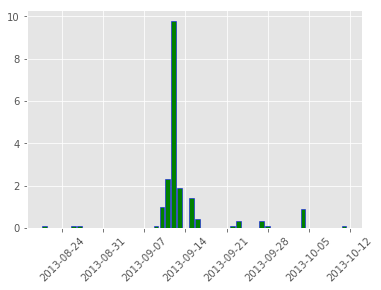

In [76]:
fig, ax = plt.subplots()
ax.bar(boulder_precip['DATE'].values, boulder_precip['PRECIP'].values,
       edgecolor='blue', color='green')
plt.setp(ax.get_xticklabels(), rotation=45);

In [1]:
# ```{r barcolor2, purl=FALSE, fig.cap="ggplot with green bars"}

# ggplot(data = boulder_precip,  aes(x = DATE, y = PRECIP)) +

#     geom_bar(stat="identity", color="blue", fill="green")



# ```






## Add plot labels



You can add labels to your plots as well. Let's add a title, and x and y labels using the glab() argument.




[Text(0,0.5,'Precipitation (Inches)'),
 Text(0.5,0,'Date'),
 Text(0.5,1,'Daily Precipitation (inches)\nBoulder, Colorado 2013')]

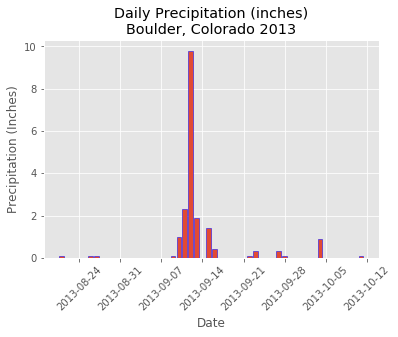

In [77]:
fig, ax = plt.subplots()
ax.bar(boulder_precip['DATE'].values, boulder_precip['PRECIP'].values,
       edgecolor='blue')
plt.setp(ax.get_xticklabels(), rotation=45);
ax.set(xlabel="Date", ylabel="Precipitation (Inches)", title="Daily Precipitation (inches)\nBoulder, Colorado 2013");

In [1]:
# ```{r add-title, fig.cap="ggplot with labels" }

# ggplot(data = boulder_precip,  aes(x = DATE, y = PRECIP)) +

#     geom_point(alpha = 0.9, aes(color=PRECIP)) +

#     glabs(x="Date",

#       y="Precipitation (Inches)",

#       title="Daily Precipitation (inches)"

#       subtitle="Boulder, Colorado 2013")

# ```
